# 🧪 SQL Retail Sales Analysis Notebook
This notebook analyzes Superstore sales data using Python, SQLite, SQL, and data visualization.

In [48]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [49]:
# 📥 Load dataset and write to SQLite
df = pd.read_csv('../data/SampleSuperstore.csv', encoding='ISO-8859-1')

# Connect to SQLite (this creates a new DB file if not present)
conn = sqlite3.connect('../superstore.db')

# Write data to SQLite table named 'sales'
df.to_sql('sales', conn, if_exists='replace', index=False)

# Preview dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [50]:
# 🔍 Total sales by region (SQL Query)
query = '''
SELECT Region, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region
ORDER BY TotalSales DESC;
'''
df_region_sales = pd.read_sql_query(query, conn)
df_region_sales

,Region,TotalSales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


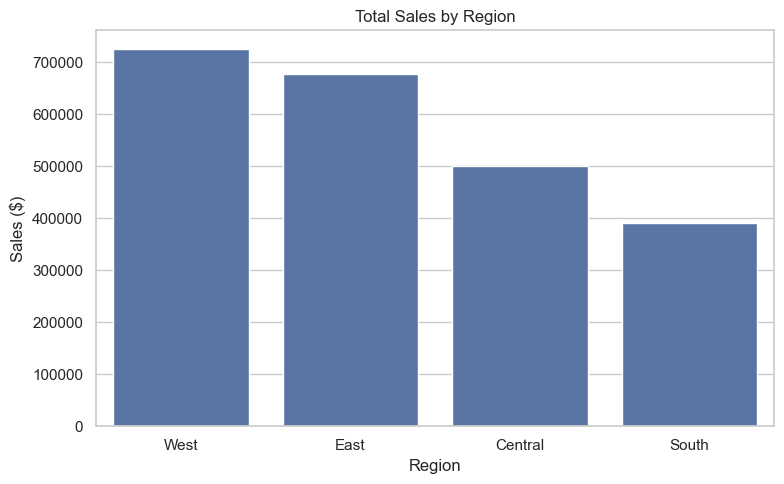

In [51]:
# 📊 Visualize and save total sales by region
plt.figure(figsize=(8, 5))
sns.barplot(data=df_region_sales, x='Region', y='TotalSales')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.tight_layout()

# Save the figure
plt.savefig("../visuals/total_sales_by_region.png", dpi=300)

plt.show()

In [52]:
# 🛍️ Top 10 products by profit
query = '''
SELECT [Product Name] AS Product, SUM(Profit) AS TotalProfit
FROM sales
GROUP BY [Product Name]
ORDER BY TotalProfit DESC
LIMIT 10;
'''
df_top_products = pd.read_sql_query(query, conn)
df_top_products

,Product,TotalProfit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,Ativa V4110MDD Micro-Cut Shredder,3772.9461
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
8,Ibico EPK-21 Electric Binding System,3345.2823
9,Zebra ZM400 Thermal Label Printer,3343.5360


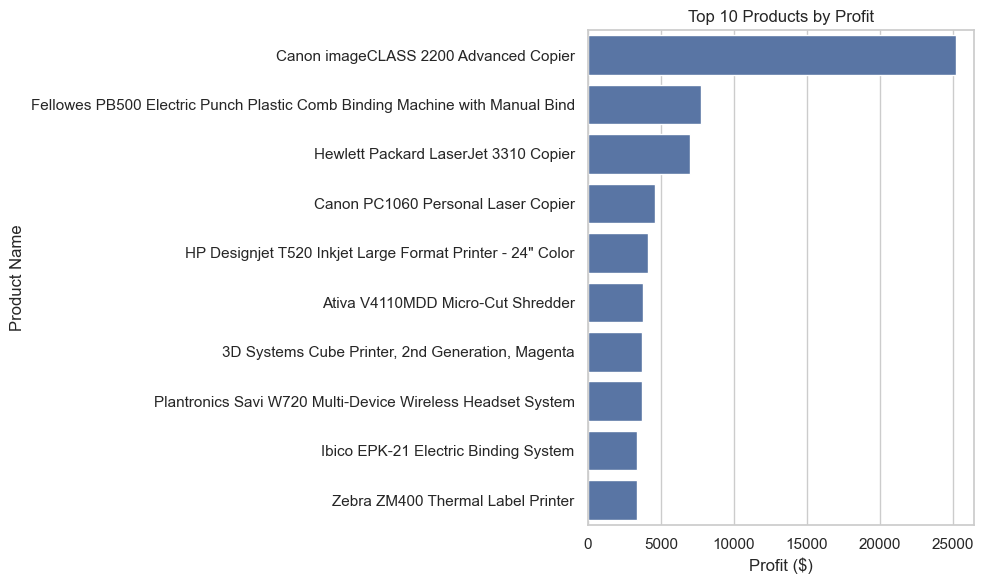

In [53]:
# 📊 Visualize and save top products by profit
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_products, x='TotalProfit', y='Product')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit ($)')
plt.ylabel('Product Name')
plt.tight_layout()

plt.savefig("../visuals/top_products_by_profit.png", dpi=300)

plt.show()

In [54]:
# 🚚 Average shipping delay by shipping mode
query = '''
SELECT [Ship Mode], AVG(julianday([Ship Date]) - julianday([Order Date])) AS AvgShippingDelay
FROM sales
GROUP BY [Ship Mode]
ORDER BY AvgShippingDelay DESC;
'''
df_shipping_delay = pd.read_sql_query(query, conn)
df_shipping_delay

,Ship Mode,AvgShippingDelay
0,Standard Class,None
1,Second Class,None
2,Same Day,None
3,First Class,None


Let’s calculate shipping delay directly using pandas:

In [55]:
# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Calculate shipping delay
df['ShippingDelay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by shipping mode
df_shipping_delay = df.groupby('Ship Mode')['ShippingDelay'].mean().reset_index().sort_values(by='ShippingDelay', ascending=False)
df_shipping_delay

,Ship Mode,ShippingDelay
3,Standard Class,5.006535
2,Second Class,3.238046
0,First Class,2.182705
1,Same Day,0.044199


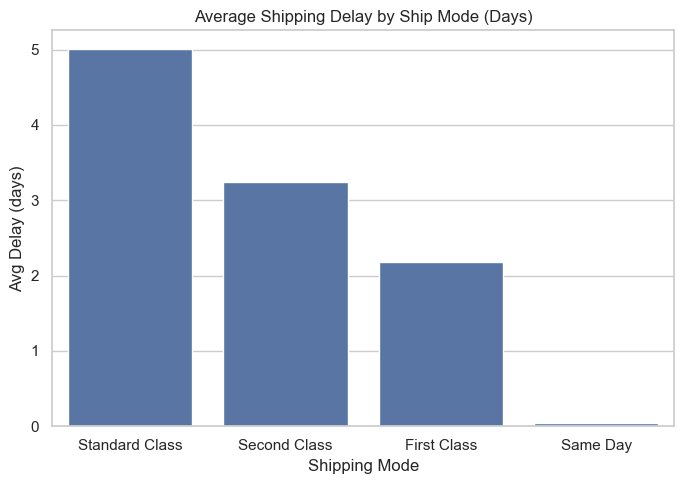

In [56]:
# 📊 Visualize and save average shipping delay
plt.figure(figsize=(7, 5))
sns.barplot(data=df_shipping_delay, x='Ship Mode', y='ShippingDelay')
plt.title('Average Shipping Delay by Ship Mode (Days)')
plt.xlabel('Shipping Mode')
plt.ylabel('Avg Delay (days)')
plt.tight_layout()
plt.savefig("../visuals/avg_shipping_delay.png", dpi=300)
plt.show()

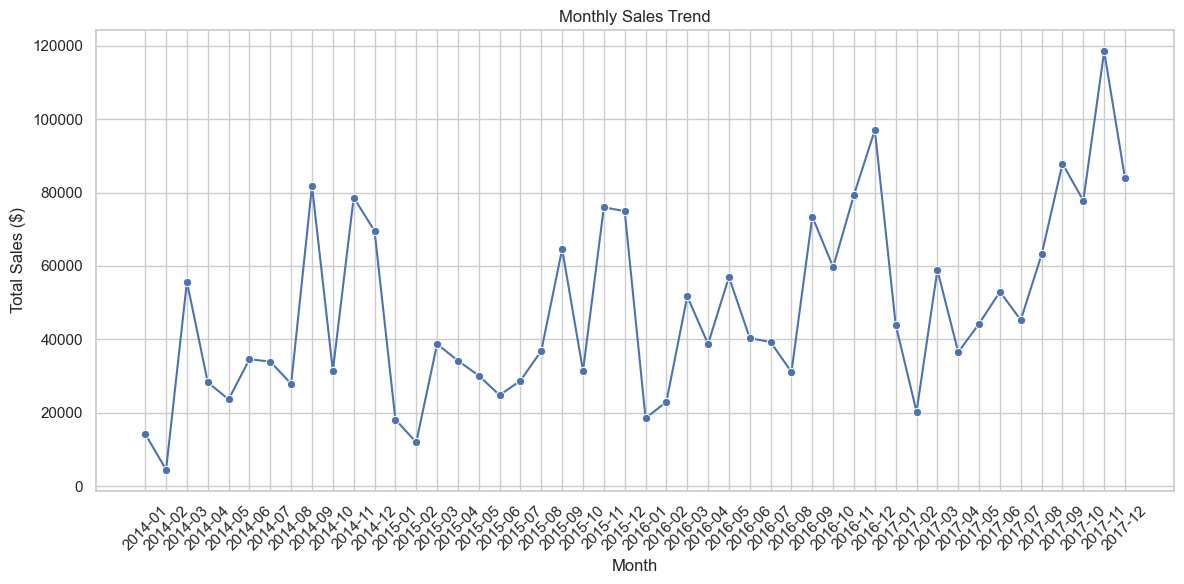

In [57]:
# Convert 'Order Date' to datetime if not already
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract 'OrderMonth' for grouping
df['OrderMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Calculate total sales per month
df_monthly_sales = df.groupby('OrderMonth')['Sales'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_sales, x='OrderMonth', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/monthly_sales_trend.png", dpi=300)
plt.show()

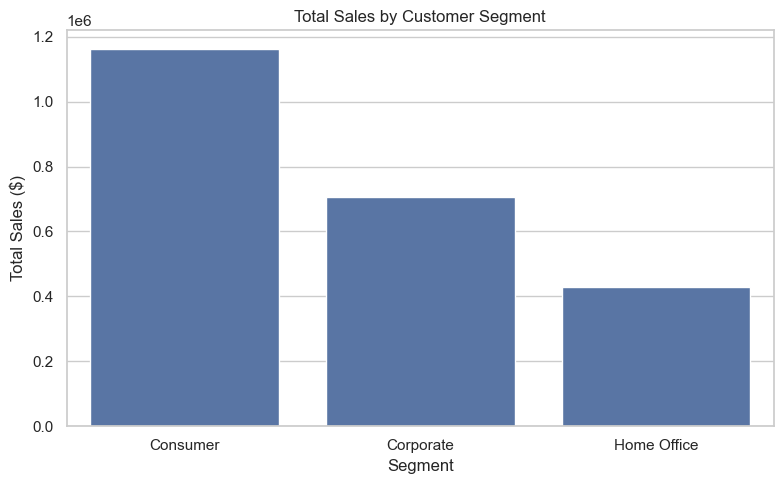

In [58]:
# Calculate total sales by customer segment
df_segment_sales = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot sales by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(data=df_segment_sales, x='Segment', y='Sales')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig("../visuals/sales_by_customer_segment.png", dpi=300)
plt.show()